In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import calendar

# Загрузка файлов 

1. Таблица с уникальными идентификаторами пользователей:

In [2]:
url_1 = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/QXrVDUoQvFhIcg'

In [3]:
customers_df = pd.read_csv(url_1)

2. Таблица заказов:

In [4]:
url_2 = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/0zWmh1bYP6REbw'

In [5]:
orders_df = pd.read_csv(url_2)

3. Товарные позиции, входящие в заказы:

In [6]:
url_3 = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'

In [7]:
items_df = pd.read_csv(url_3)

## Изучим имеющиеся данные поподробнее 

In [8]:
customers_df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [9]:
customers_df.shape

(99441, 5)

In [10]:
customers_df.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [11]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
orders_df.shape

(99441, 8)

In [13]:
orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Для удобства дальнейшей работы с данными будет полезно преобразовать колонки с датами в соответсвующий формат:

In [14]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df.order_purchase_timestamp)

In [15]:
orders_df['order_approved_at'] = pd.to_datetime(orders_df.order_approved_at)

In [16]:
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df.order_delivered_carrier_date)

In [17]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df.order_delivered_customer_date)

In [18]:
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df.order_estimated_delivery_date)

Посмотрим, какие статусы присутствуют в этой таблице.

In [19]:
orders_df.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [20]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
items_df.shape

(112650, 7)

In [22]:
items_df.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Преобразуем shipping_limit_date в формат даты

In [23]:
items_df['shipping_limit_date'] = pd.to_datetime(items_df.shipping_limit_date)

###  Что использовать в качестве уникального идентификатора пользователя: 'customer_id'  или 'customer_unique_id'?
Для того чтобы понять в чем отличия 'customer_id' от 'customer_unique_id', я внимательно посмотрела на таблицы customers_df и 
orders_df. Одинаковое количество строк в этих таблицах наводит на мысль, что 'customer_id' меняется от заказа к заказу, а
'customer_unique_id' уникален для каждого пользователя вне зависимости от количества заказов, которые он сделал. Чтобы 
подтведить эту теорию, я проверю количество уникальных 'customer_unique_id', а затем посмотрю дублируются ли они. 

In [24]:
customers_df.customer_unique_id.nunique() # уникальные ID пользователей

96096

In [25]:
# пользователи, которые сделали заказ больше одного раза
customers_df.groupby('customer_unique_id', as_index=False).agg({'customer_id': 'count'}) \
.query('customer_id > 1').customer_id.sum()

6342

In [26]:
# проверим количество customer_unique_id пользователей, которые сделали заказ больше одного раза
customers_df.groupby('customer_unique_id', as_index=False).agg({'customer_id': 'count'}) \
.query('customer_id > 1').customer_unique_id.nunique()

2997

In [27]:
# пользователи, которые сделали заказ только один раз
customers_df.groupby('customer_unique_id', as_index=False).agg({'customer_id': 'count'}) \
.query('customer_id == 1').customer_id.sum()

93099

In [28]:
#проверим количество customer_unique_id пользователей, которые сделали заказ только один раз
customers_df.groupby('customer_unique_id', as_index=False).agg({'customer_id': 'count'}) \
.query('customer_id == 1').customer_unique_id.nunique()

93099

**Вывод:** количество пользователей, которые сделали заказ один раз, совпадает с количеством уникальных ID. Для остальных customer_unique_id дублируется. Поэтому в качестве уникального номера клиента будем использовать именно customer_unique_id

### Какие заказы нужно считать куплеными? 
Куплеными можно считать заказы, которые оплачены, но не отменены и не недоступны

In [29]:
bought_orders = orders_df.query("order_approved_at != 'NaN' & order_status != 'canceled' & order_status != 'unavailable' ")

In [30]:
bought_orders.order_status.value_counts()

delivered     96464
shipped        1107
invoiced        314
processing      301
approved          2
Name: order_status, dtype: int64

In [31]:
bought_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Для нахождения количества пользователей, которые сделали покупку только один раз нужно: 
1. Смержить customers_df и orders_df
2. Отфильтровать купленные заказы
2. Сгрупировать данные по пользоваталям (customer_unique_id)
3. Просуммировать количество завершенных заказов 
4. Посчитать количество пользователей, для которых количество завершенных заказо равно 1

In [32]:
df_single_order = orders_df.merge(customers_df, on='customer_id', how="left")
orders_qty =    df_single_order.query("order_approved_at != 'NaN' & order_status != 'canceled' & order_status != 'unavailable'") \
                .groupby('customer_unique_id', as_index=False) \
                .agg({'customer_id':'count'}) \
                .query("customer_id == 1") \
                .count()

In [33]:
orders_qty

customer_unique_id    92087
customer_id           92087
dtype: int64

In [34]:
print(f'Количество пользователей, которые совершили только одну покупку: {orders_qty.customer_id}')

Количество пользователей, которые совершили только одну покупку: 92087


## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Недоставленным заказом будем считать заказы со статусами 'canceled' и 'unavailable'. Также иногда по разным причинам недоставленными заказами могут считаться и заказы с другими статусами, если время их доставки намного превышает среднее. Поэтому можно проверить есть ли у нас такие заказы

### 1. Проанализируем время доставки заказов 

In [35]:
delivered_orders = orders_df.query("order_status == 'delivered'")

In [36]:
delivered_orders['delivery_time'] = \
(delivered_orders.order_delivered_customer_date - delivered_orders.order_purchase_timestamp).dt.days

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Количество дней доставки')]

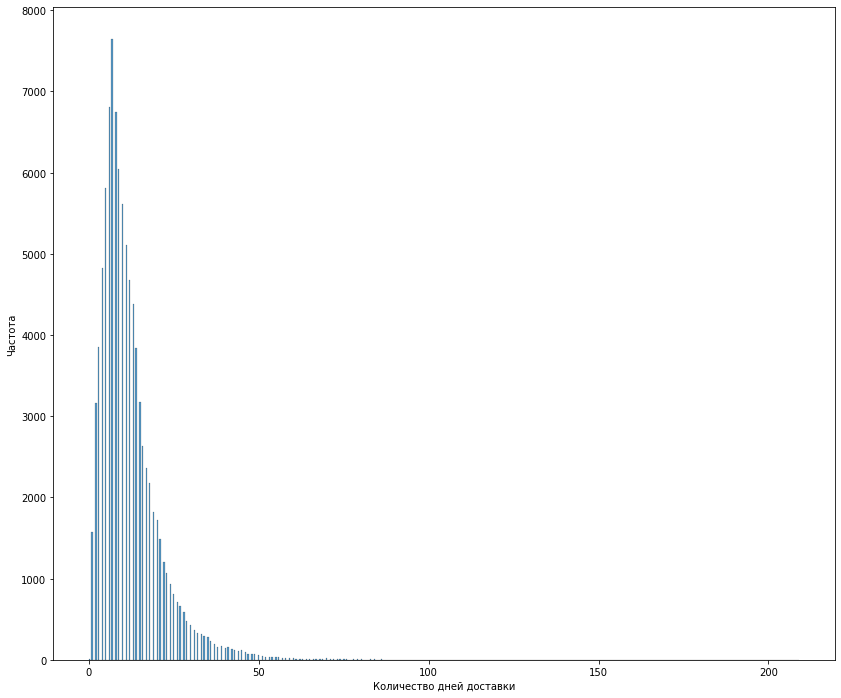

In [37]:
plt.figure(figsize=(14,12))
del_time = sns.histplot(delivered_orders.delivery_time)
del_time.set(xlabel="Количество дней доставки", ylabel="Частота")

Здесь мы видим, что время доставки заказа в некоторых случаях может доходить до 200 дней. То есть, если мы видим, что для какого-либо заказа с момента размещения доставки прошло много времени (намного больше чем среднее время доставки), то мы не можем быть уверенны, что он и не будет доставлен. Возможно, такие задержки происходят из-за особенностей логистики для некоторых типов продукции или для определенных поставщиков.  

### 2. Рассмотрим заказы со статусом 'canceled' и 'unavailable'

In [38]:
not_delivered = orders_df.query("order_status == 'canceled' or order_status == 'unavailable'")

Проверим даты доставки, все ли они пустые? 

In [39]:
not_delivered.order_delivered_customer_date.value_counts()

2016-10-19 18:47:43    1
2016-10-16 14:36:59    1
2016-11-08 10:58:34    1
2018-03-21 22:03:51    1
2016-10-14 15:07:11    1
2016-11-09 14:53:50    1
Name: order_delivered_customer_date, dtype: int64

In [40]:
not_delivered = not_delivered.query("order_delivered_customer_date == 'NaN'")

Так как 'order_purchase_timestamp' едиственная дата, которая есть у всех недоставленных заказов будем опираться на нее.
А так как нас интересует месяц заказа, приведем ее к формату гггг-мм

In [41]:
not_delivered['order_purchase_timestamp'] = not_delivered.order_purchase_timestamp.dt.strftime('%Y-%m')

In [42]:
not_delivered = not_delivered.groupby(['order_purchase_timestamp', 'order_status'], as_index=False) \
                .agg({'customer_id': 'count'}).rename(columns={'customer_id': 'qty_orders'})

In [43]:
not_delivered_pivot = not_delivered.pivot(index='order_purchase_timestamp', columns='order_status', values='qty_orders')

In [44]:
not_delivered_pivot['total_orders'] = not_delivered_pivot.canceled + not_delivered_pivot.unavailable

In [45]:
not_delivered_pivot.head()

order_status,canceled,unavailable,total_orders
order_purchase_timestamp,,,
2016-09,2.0,NaN,NaN
2016-10,19.0,7.0,26.0
2017-01,3.0,10.0,13.0
2017-02,17.0,45.0,62.0
2017-03,33.0,32.0,65.0


In [46]:
canсeled_mean = round(not_delivered_pivot.canceled.mean())
unavailable_mean =  round(not_delivered_pivot.unavailable.mean())
total_mean = round(not_delivered_pivot.total_orders.mean())

In [47]:
print(f'Среднее количество отмененных заказов в месяц: {canсeled_mean}')
print(f'Среднее количество недоступных заказов в месяц: {unavailable_mean}')
print(f'Общее среднее количество недоставленных заказов в месяц: {total_mean}')

Среднее количество отмененных заказов в месяц: 26
Среднее количество недоступных заказов в месяц: 29
Общее среднее количество недоставленных заказов в месяц: 57


# 3. По каждому товару определим, в какой день недели товар чаще всего покупается.

In [48]:
ordered_items = items_df.merge(orders_df, on='order_id', how='left')

In [49]:
# отфильтруем заказы, которые считаем куплеными
ordered_items = ordered_items.query("order_approved_at != 'NaN' & order_status != 'canceled' & order_status != 'unavailable'")

In [50]:
ordered_items['order_weekday'] = ordered_items.order_purchase_timestamp.dt.day_name()
ordered_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_weekday
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,Saturday


In [51]:
ordered_items_weekday = ordered_items.groupby(['product_id', 'order_weekday'], as_index = False) \
                        .agg({'order_id': 'count'}) \
                        .rename(columns={'order_id':'total_orders'}) \
                        .sort_values('total_orders', ascending=False) \
                        .drop_duplicates(subset='product_id')

In [52]:
ordered_items_weekday.shape

(32726, 3)

In [53]:
ordered_items_weekday.nunique()

product_id       32726
order_weekday        7
total_orders        49
dtype: int64

In [54]:
items_df.product_id.nunique()

32951

Количество уникальных 'product_id' соотвествует количеству строк в получившемся датафрейме, следовательно, он сформирован правильно. Количество уникальных 'product_id' в исходном датафрейме на 225 позиций больше. Это может быть связано с тем, что эти позиции никогда не заказывались. 

In [55]:
ordered_items_weekday.head(3)

,product_id,order_weekday,total_orders
15812,422879e10f46682990de24d770e7f83d,Wednesday,93
36305,99a4788cb24856965c36a24e339b6058,Monday,92
40819,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89


# 4. Рассчитать среднее количество покупок в неделю для каждого пользователя по месяцам.

Будем работвть с датафреймом bought_orders. Чтобы определить количество покупок для каждого пользователя объединим его с датафреймом customers_df

In [56]:
bought_orders_weekly = bought_orders.merge(customers_df, on='customer_id', how='left')
bought_orders_weekly.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [57]:
bought_orders_weekly['purchase_month'] = bought_orders_weekly.order_purchase_timestamp.dt.strftime('%Y-%m')

In [58]:
bought_orders_weekly.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08


Уберем первый и последний месяц, так как они не полные

In [59]:
max_month = bought_orders_weekly.purchase_month.max()
min_month = bought_orders_weekly.purchase_month.min()
print(min_month, max_month)

2016-09 2018-09


In [60]:
bought_orders_weekly = bought_orders_weekly.query("purchase_month > @min_month & purchase_month < @max_month") \
                       .groupby(['customer_unique_id', 'purchase_month'], as_index=False) \
                       .agg({'order_id':'count'}) \
                       .rename(columns={'order_id': 'qty_orders_per_month'})

Находим количество недель в месяце и считаем количество заказов в неделю

In [61]:
bought_orders_weekly['week_in_month'] = list(map(lambda x: x.daysinmonth / 7, 
                                                 pd.to_datetime(bought_orders_weekly.purchase_month)))

In [62]:
bought_orders_weekly['orders_per_week'] = bought_orders_weekly.qty_orders_per_month / bought_orders_weekly.week_in_month

In [63]:
bought_orders_weekly.head(3)

,customer_unique_id,purchase_month,qty_orders_per_month,week_in_month,orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571,0.225806


### Среднее количество заказов в неделю для каждого пользователя по месяцам. 
Например, пользователь с ID
0000366f3b9a7992bf8c76cfdf3221e2 в мае 2018 года делал в среднем 0.225806 заказов в неделю. 

In [64]:
mean_weekly_orders = bought_orders_weekly.groupby(['customer_unique_id', 'purchase_month'], as_index=False) \
                                         .agg({'orders_per_week': 'mean'})
mean_weekly_orders.head()

,customer_unique_id,purchase_month,orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333


In [65]:
mean_weekly_orders.query("customer_unique_id == '8d50f5eadf50201ccdcedfb9e2ac8455'")

,customer_unique_id,purchase_month,orders_per_week
53362,8d50f5eadf50201ccdcedfb9e2ac8455,2017-05,0.225806
53363,8d50f5eadf50201ccdcedfb9e2ac8455,2017-06,0.233333
53364,8d50f5eadf50201ccdcedfb9e2ac8455,2017-07,0.451613
53365,8d50f5eadf50201ccdcedfb9e2ac8455,2017-08,0.225806
53366,8d50f5eadf50201ccdcedfb9e2ac8455,2017-09,0.233333
53367,8d50f5eadf50201ccdcedfb9e2ac8455,2017-10,0.451613
53368,8d50f5eadf50201ccdcedfb9e2ac8455,2017-11,0.233333
53369,8d50f5eadf50201ccdcedfb9e2ac8455,2018-05,0.451613
53370,8d50f5eadf50201ccdcedfb9e2ac8455,2018-07,0.451613
53371,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08,0.677419


Построим график и посмотрим как изменялась эта метрика

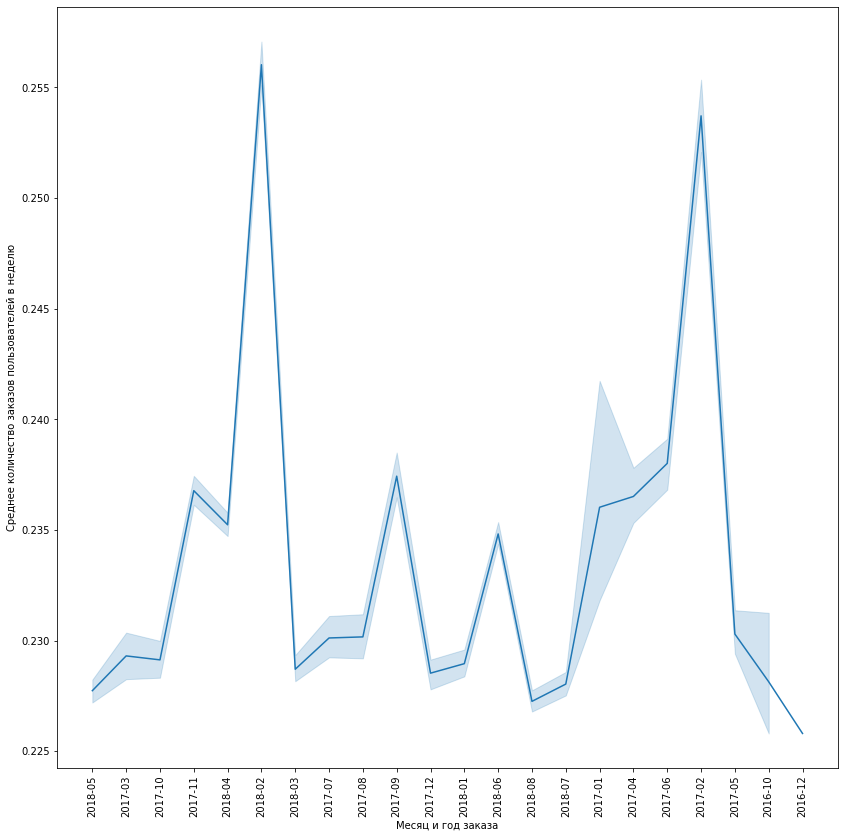

In [66]:
plt.figure(figsize=(14,14))
weekly_orders = sns.lineplot(x='purchase_month', y='orders_per_week', data=mean_weekly_orders)
weekly_orders.set(xlabel="Месяц и год заказа", ylabel="Среднее количество заказов пользователей в неделю")
weekly_orders.tick_params(axis='x', rotation=90)

# 5. Провести когортный анализ пользователей, выявить когорту с самым высоким retention на третий месяц.

Работать будем с датафреймом bought_orders. Отфильтруем только подходящие по условию записи: возьмем данные за 2017 год + 3 месяца

In [67]:
min_day = '2017-01-01'
max_day = '2018-04-01'

In [68]:
bought_orders_retention = bought_orders.query("order_purchase_timestamp > @min_day & order_purchase_timestamp <= @max_day")

In [69]:
bought_orders_retention = bought_orders_retention.merge(customers_df, on='customer_id', how='left')

Создадим колонку с месяцем и годом заказа

In [70]:
bought_orders_retention['month_of_order'] = \
    pd.to_datetime(bought_orders_retention.order_purchase_timestamp.dt.strftime('%Y-%m'))

In [71]:
bought_orders_retention.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_of_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01
1,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-01
2,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02-01


Формируем когорты по дате первого заказа: создаем колонку с указанием даты первого заказа и считаем количество клиентов сделавших певрый заказ в этом месяце (cohort_volume).  

In [72]:
cohorts_df = bought_orders_retention.groupby('customer_unique_id', as_index=False) \
                         .agg({'month_of_order': 'min'}) \
                         .rename(columns={'month_of_order':'month_of_first_order'})

In [73]:
cohorts_df = cohorts_df.merge(bought_orders_retention, on='customer_unique_id', how='left') \
                       .groupby(['month_of_first_order', 'month_of_order'], as_index=False) \
                       .agg({'customer_unique_id': 'nunique'}) \
                       .rename(columns={'customer_unique_id':'number_of_customers'})

In [74]:
cohorts_df.head(3)

,month_of_first_order,month_of_order,number_of_customers
0,2017-01-01,2017-01-01,751
1,2017-01-01,2017-02-01,3
2,2017-01-01,2017-03-01,2


Добавляем колонку с номером месяца, когда пользователь сделал свой следующий заказ

In [75]:
cohorts_df['return_month_number'] = list(map(lambda x, y: (y.year - x.year) * 12 + y.month - x.month, 
                                             cohorts_df.month_of_first_order, 
                                             cohorts_df.month_of_order))

In [76]:
cohorts_df.head()

,month_of_first_order,month_of_order,number_of_customers,return_month_number
0,2017-01-01,2017-01-01,751,0
1,2017-01-01,2017-02-01,3,1
2,2017-01-01,2017-03-01,2,2
3,2017-01-01,2017-04-01,1,3
4,2017-01-01,2017-05-01,3,4


Выделяем в отдельный датафрейм информацию об объеме когорт: это количество пользователей совершивших покупки в первый месяц. 
Соотвественно, нам достаточно взять только первые строки из chorts_df

In [77]:
cohort_volume = cohorts_df.groupby('month_of_first_order', as_index=False) \
                          .agg({'number_of_customers':'first'}) \
                          .rename(columns={'number_of_customers': 'total_customers'})

In [78]:
cohort_volume

,month_of_first_order,total_customers
0,2017-01-01,751
1,2017-02-01,1678
2,2017-03-01,2571
3,2017-04-01,2326
4,2017-05-01,3541
5,2017-06-01,3102
6,2017-07-01,3823
7,2017-08-01,4130
8,2017-09-01,4076
9,2017-10-01,4393


In [79]:
all_retention = cohorts_df.merge(cohort_volume, on='month_of_first_order', how='left')

In [80]:
all_retention.head(3)

,month_of_first_order,month_of_order,number_of_customers,return_month_number,total_customers
0,2017-01-01,2017-01-01,751,0,751
1,2017-01-01,2017-02-01,3,1,751
2,2017-01-01,2017-03-01,2,2,751


In [81]:
all_retention['retention_rate'] = (all_retention.number_of_customers / all_retention.total_customers)

In [82]:
all_retention.head(3)

,month_of_first_order,month_of_order,number_of_customers,return_month_number,total_customers,retention_rate
0,2017-01-01,2017-01-01,751,0,751,1.000000
1,2017-01-01,2017-02-01,3,1,751,0.003995
2,2017-01-01,2017-03-01,2,2,751,0.002663


Топ 3 retention_rate на 3й месяц

In [83]:
third_month_retention = all_retention.query("return_month_number == 3").sort_values('retention_rate', ascending=False)

In [84]:
third_month_retention.head(3)

,month_of_first_order,month_of_order,number_of_customers,return_month_number,total_customers,retention_rate
56,2017-05-01,2017-08-01,14,3,3541,0.003954
31,2017-03-01,2017-06-01,10,3,2571,0.003890
67,2017-06-01,2017-09-01,12,3,3102,0.003868


In [85]:
all_retention.month_of_first_order = all_retention.month_of_first_order.dt.strftime('%Y-%m')

In [86]:
all_retention_pivot = all_retention.pivot(index='month_of_first_order', columns='return_month_number', values='retention_rate')

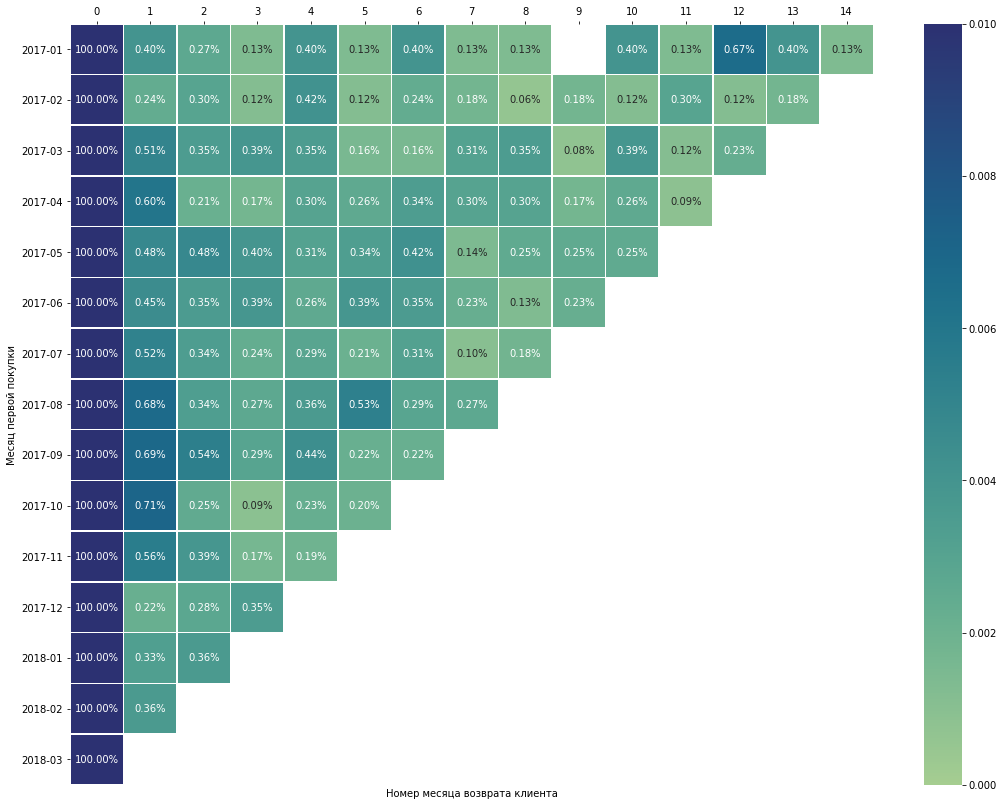

In [87]:
plt.figure(figsize=(18,14))
retention = sns.heatmap(all_retention_pivot, annot=True, cmap="crest", vmin=0.0, vmax=0.01, linewidth=.5, fmt=".2%")
retention.set(xlabel="Номер месяца возврата клиента", ylabel="Месяц первой покупки")
retention.xaxis.tick_top()
retention.tick_params(axis='y', rotation=0)

**Вывод:** Самый высокий retention rate на 3й месяц был зафиксирован в мае 2017 года

# 6. Построить RFM-сегментацию пользователей. Описать созданные кластеры с учетом метрик recency, frequency и monetary. Сделать выводы

Готовим датафрейм. Выбираем только данные по совершенным покупкам и отпределяем дату для расчета Recency. 

In [88]:
items_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [89]:
items_df['total_price'] = items_df.order_item_id * items_df.price

In [90]:
items_df.shape

(112650, 8)

In [91]:
order_prices = items_df.groupby('order_id', as_index=False).agg({'total_price': 'sum'})

In [92]:
rfm_df = bought_orders.merge(order_prices, on='order_id', how='left') \
                      .merge(customers_df, on='customer_id', how='left')

In [93]:
rfm_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_price,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.99,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,118.70,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,159.90,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


За текущую дату возьмем дату последнего заказа плюс один день

In [94]:
now_date = rfm_df.order_purchase_timestamp.max() + dt.timedelta(days=1)
now_date

Timestamp('2018-09-04 09:06:57')

### 1. Рассчитываем Recency, Frequency и Monetary

In [95]:
rfm_df = rfm_df.groupby('customer_unique_id', as_index=False) \
               .agg({'order_purchase_timestamp':'max', 'order_id':'count', 'total_price':'sum'}) \
               .rename(columns={'order_purchase_timestamp': 'last_order_date', 'order_id':'frequency', 'total_price':'monetary'})

In [96]:
rfm_df['recency'] = (now_date - rfm_df.last_order_date).dt.days

In [97]:
rfm_df.head()

,customer_unique_id,last_order_date,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90,119
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00,542
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99,326
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00,293


### 2. Находим квантили для каждого показателя и преобразуем их в оценку

In [98]:
rfm_df.describe()

,frequency,monetary,recency
count,94973.000000,94973.000000,94973.000000
mean,1.033852,160.880032,243.403178
std,0.210798,370.474740,152.966551
min,1.000000,0.000000,1.000000
25%,1.000000,48.900000,119.000000
50%,1.000000,89.990000,224.000000
75%,1.000000,167.500000,352.000000
max,16.000000,60480.000000,729.000000


In [99]:
quintiles = rfm_df[['recency', 'frequency', 'monetary']].quantile([0.25, 0.50, 0.75]).to_dict()
quintiles

{'recency': {0.25: 119.0, 0.5: 224.0, 0.75: 352.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 48.9, 0.5: 89.99, 0.75: 167.5}}

In [100]:
def r_score(x):
    if x <= quintiles['recency'][0.25]:
        return 4
    elif x <= quintiles['recency'][0.50]:
        return 3
    elif x <= quintiles['recency'][0.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][0.25]:
        return 1
    elif x <= quintiles[c][0.50]:
        return 2
    elif x <= quintiles[c][0.75]:
        return 3
    else:
        return 4    

In [101]:
rfm_df['R'] = rfm_df['recency'].apply(lambda x: r_score(x))
rfm_df['F'] = rfm_df['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm_df['M'] = rfm_df['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [102]:
rfm_df.head()

,customer_unique_id,last_order_date,frequency,monetary,recency,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90,116,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90,119,4,1,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00,542,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99,326,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00,293,2,1,4


### 3. Комбинируем R, F и M чтобы получить общий RFM показатель

In [103]:
rfm_df['rfm_score'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

In [104]:
rfm_df.head()

,customer_unique_id,last_order_date,frequency,monetary,recency,R,F,M,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90,116,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90,119,4,1,1,411
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00,542,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99,326,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00,293,2,1,4,214


### 4. Выделяем сегменты, основываясь на RFM

В зависимости от потребностей можно выделить разные сегменты. Допустим, мы хотели бы выяснить как много потенциально постоянных 
клиентов мы потеряли за этот период и, если необходимо, протестировать какие-то новые промо акции для клиентов, которые пришли к нам недавно. 
1. Постоянные клиенты: делали покупки недавно, покупают довольно часто, тратят много денег
            - recency 1-2 и frequency 3-4
2. Новые клиенты: сделали одну или несколько покупок недавно
            - recency 1-2 и frequency 1-2
3. Клиенты, на которых стоит обратить внимание: делали покупки довольно часто, но уже давно не возвращались
            - recency 3-4 и frequency 3-4
4. Потеряные клиенты: сделали несколько покупок довольно давно
            - recency 3-4 и frequency 1-2

In [105]:
segt_map = {
    r'[1-2][3-4]': 'frequent visitor',
    r'[1-2][1-2]': 'new customers',
    r'[3-4][3-4]': 'need attention',
    r'[3-4][1-2]': 'lost customers'
}

rfm_df['Segment'] = rfm_df['R'].map(str) + rfm_df['F'].map(str)
rfm_df['Segment'] = rfm_df['Segment'].replace(segt_map, regex=True)
rfm_df.head()

,customer_unique_id,last_order_date,frequency,monetary,recency,R,F,M,rfm_score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90,116,4,1,3,413,lost customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90,119,4,1,1,411,lost customers
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00,542,1,1,2,112,new customers
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99,326,2,1,1,211,new customers
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00,293,2,1,4,214,new customers


[Text(0, 0.5, 'Количество пользователей'), Text(0.5, 0, 'Сегмент')]

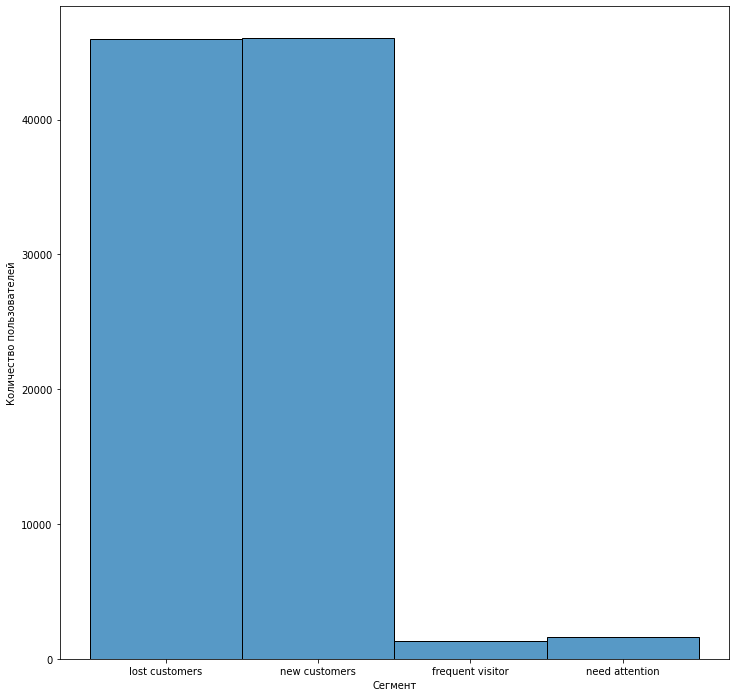

In [106]:
plt.figure(figsize=(12,12))
rfm = sns.histplot(rfm_df.Segment)
rfm.set(xlabel="Сегмент", ylabel="Количество пользователей")

### Вывод:

По графику видно, что за прошедший период у компании было большое количество потеряных клиентов, а постоянных клиентов крайне мало. Однако, новых клиентов также довольно много, поэтому стоит поработать над стратегией удержания новых клиентов. 